<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification with Keras and Tensorflow (ANNs)

MNIST Dataset

#Task 1: Import Libraries.

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Task 2 : Import MNIST dataset.

In [3]:
from tensorflow.keras.datasets import mnist

mnist.load_data() returns training and testing data.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We use the training data to fit and train the NN.

We use the test data to test/validate the performance of our NN.

##Shapes of all the datasets imported.

In [7]:
print(f'x_train :{x_train.shape}')
print(f'y_train :{y_train.shape}')

print(f'x_test :{x_test.shape}')
print(f'y_test :{y_test.shape}')

x_train :(60000, 28, 28)
y_train :(60000,)
x_test :(10000, 28, 28)
y_test :(10000,)


In [8]:
#So in (60000, 28 , 28)

#We have 60000 image examples - ie, 60000 Images
#Each Image has 28 Rows and 28 Columns - Each image is 28x28 pixel sized.

Let's try and display one example.

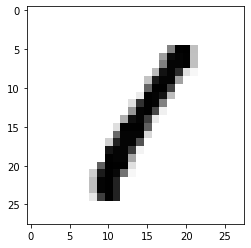

In [12]:
plt.imshow(x_train[3], cmap='binary')

In [13]:
print(y_train[3])

1


In [15]:
#Let's see how many unique labels do we have. 
#Remember? Sets only allow unique values to be stored in em. 

print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


ANNs can identify and classify really well. 

The only catch is that they need a lot of training data and hence a lot of computational power. 

That's why you can see that we have taken 60,000 training examples.

In [16]:
####################################

#Task 3: One Hot Encoding

n_uniquelabels = 10 (0 --> 9)

> In this, every label (every y value) is converted to a list of 10 (n_unuiquelabels) elements. And hence, the element at the index coresponding to y's class will be 1, rest all 0. 

Examples :- list - [0,0,0,0,0,0,0,0,0,0]

> 0 : [1,0,0,0,0,0,0,0,0,0]

> 1 : [0,1,0,0,0,0,0,0,0,0]

> 9 : [0,0,0,0,0,0,0,0,0,1]

We can get this done automatically with tensorflow.keras.utils - to_categorical , utility.

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)

y_test_encoded = to_categorical(y_test)

Just to check if the encoding worked as planned, let's check the shape of the encoded arrays as per the above mentioned concept.

In [18]:
y_train_encoded.shape

(60000, 10)

In [19]:
y_test_encoded.shape

(10000, 10)

In [20]:
print(y_train[0])

print(y_train_encoded[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
#################################################################

#Task 4: Neural Networks.

In [22]:
#Basic Understanding of ANNs

#Our model will have a 784 --> 128 --> 128 --> 10 structure.

In [23]:
##########################

#Task 5 : Pre-Processing the examples.

We've already converted the output labels y_train to a (60k , 10) shape by OneHotEncoding. 

Now we gotta convert the 28X28 pixel inputs into a (784,1) shape.

In [25]:
x_train_reshaped = x_train.reshape(60000,784)

x_test_reshaped = x_test.reshape(10000,784)

In [26]:
x_train_reshaped.shape

(60000, 784)

In [27]:
x_test_reshaped.shape

(10000, 784)

Let's see the unique pixel values of any example.

In [29]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


You can see that the values range from 0 (min) to 255(max).

It would be better to normalize these values to bring it within a small/finite range, so that the errors don't blow up.

##Data Normalization.

In [30]:
x_mean = np.mean(x_train_reshaped)

x_std = np.std(x_train_reshaped)

In [31]:
epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)

#why epsilon? Because sometimes a very small value of std can cause error to blow up. 
#adding another small value just solves that issue.

In [32]:
#Now to avoid leakage, and to make sure whatever we do on train is what we do on test
#to be purely unbiased, we use same mean and std to normalize test set.

x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [35]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [ ]:
###############################################################################################

#Task 6: Creating the model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(128, activation='relu', input_shape=(784,)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                  ])

##Compile the Model

This is where the optimization algorithm is set.

In [37]:
model.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [38]:
##################################################

#Task 7: Training the model.

##Train.

In [39]:
model.fit(x_train_norm,y_train_encoded,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8909
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1832 - accuracy: 0.9465
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1389 - accuracy: 0.9595
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9674
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0952 - accuracy: 0.9722


In [40]:
#Can see that the model accuracey is increasing epoch by epoch. 
#epoch can be thought of a one full-fledged pass throughout all the examples.

##Evaluate.

In [41]:
loss, accuracy = model.evaluate(x_test_norm,y_test_encoded)

#Note that this step doesn't train the model on the test data. 
#It uses the trained state of our model as in step 39 above (after 5 epochs)
#And checks how well the model performs on this new data. 
#Just a Forward Pass. No bakward pass. No learning. 

print(f'Model Accuracy is :{accuracy*100}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9683
Model Accuracy is :96.82999849319458%


In [42]:
#So we can comfortably say that the model has understood how to identify numbers.

In [43]:
#####################################################

#Task 8: Model Predictions.

In [44]:
y_p = model.predict(x_test_norm)

y_p.shape

(10000, 10)

##Plotting the results.

In [46]:
##TO DO.
##Brilliant idea.
###Part 8. Predictions.